### Logistic Regression on Diabetes Dataset

#### Aim:
* To find how people is affected by diabetes from various factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#### About Dataset:

 * This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
 *  The objective of the dataset is to diagnostically predict whether a patient has diabetes,based on certain diagnostic measurements included in the dataset.
 *  Several constraints were placed on the selection of these instances from a largerdatabase.
 *   In particular, all patients here are females at least 21 years old of Pima Indian heritage.2
 *   From the data set in the (.csv) File We can find several variables, some of them are independent(several medical predictor variables) and only one target dependent variable (Outcome).



#### About this file
* Information about dataset attributes -

* Pregnancies: To express the Number of pregnancies

* Glucose: To express the Glucose level in blood

* BloodPressure: To express the Blood pressure measurement

* SkinThickness: To express the thickness of the skin

* Insulin: To express the Insulin level in blood

* BMI: To express the Body mass index

* DiabetesPedigreeFunction: To express the Diabetes percentage

* Age: To express the age

* Outcome: To express the final result 1 is Yes and 0 is No

In [2]:
df=pd.read_csv('diabetes.csv') 

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### To check the no of rows and columns

In [4]:
df.shape

(768, 9)

#### To check the datatypes of the features

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### To check the feature names

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### To check the null values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Observation:
* There is no null values present in the dataset.

#### To check the duplicated values

In [8]:
df.duplicated().sum()

0

#### Observation:
* There is no duplicate values in this dataset.

#### Information about the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Statistical Summary of the dataset

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Correlation Between the Variables

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


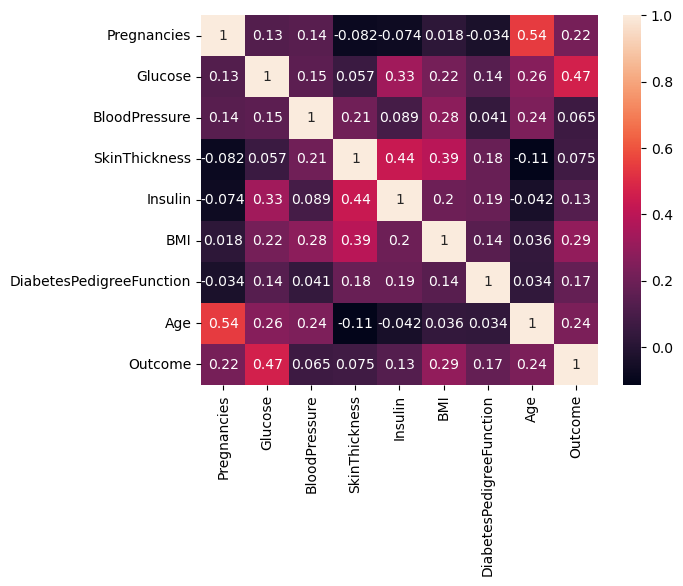

In [12]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### To find outliers

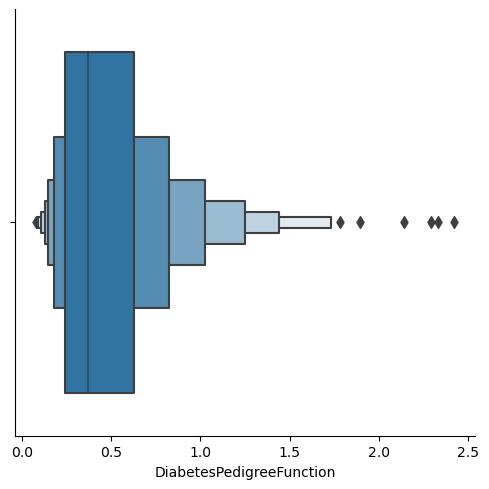

In [13]:
sns.catplot(x='DiabetesPedigreeFunction',data=df,kind='boxen')
plt.show()

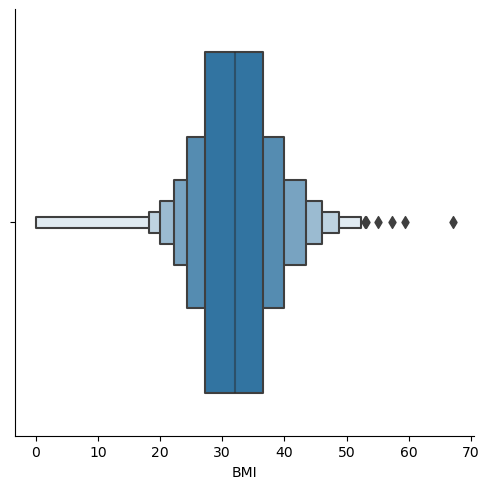

In [14]:
sns.catplot(x='BMI',data=df,kind='boxen')
plt.show()

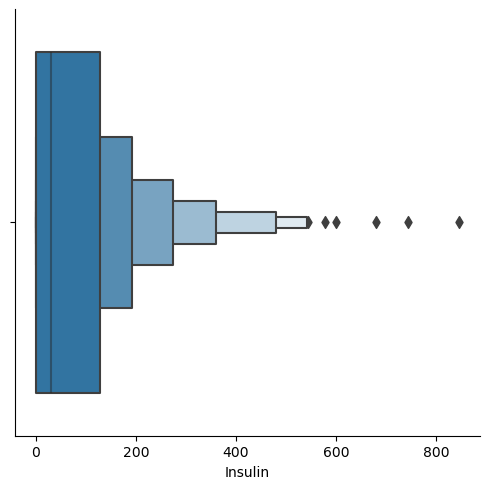

In [15]:
sns.catplot(x='Insulin',data=df,kind='boxen')
plt.show()

#### Visualizing the relationships between features using pair plots

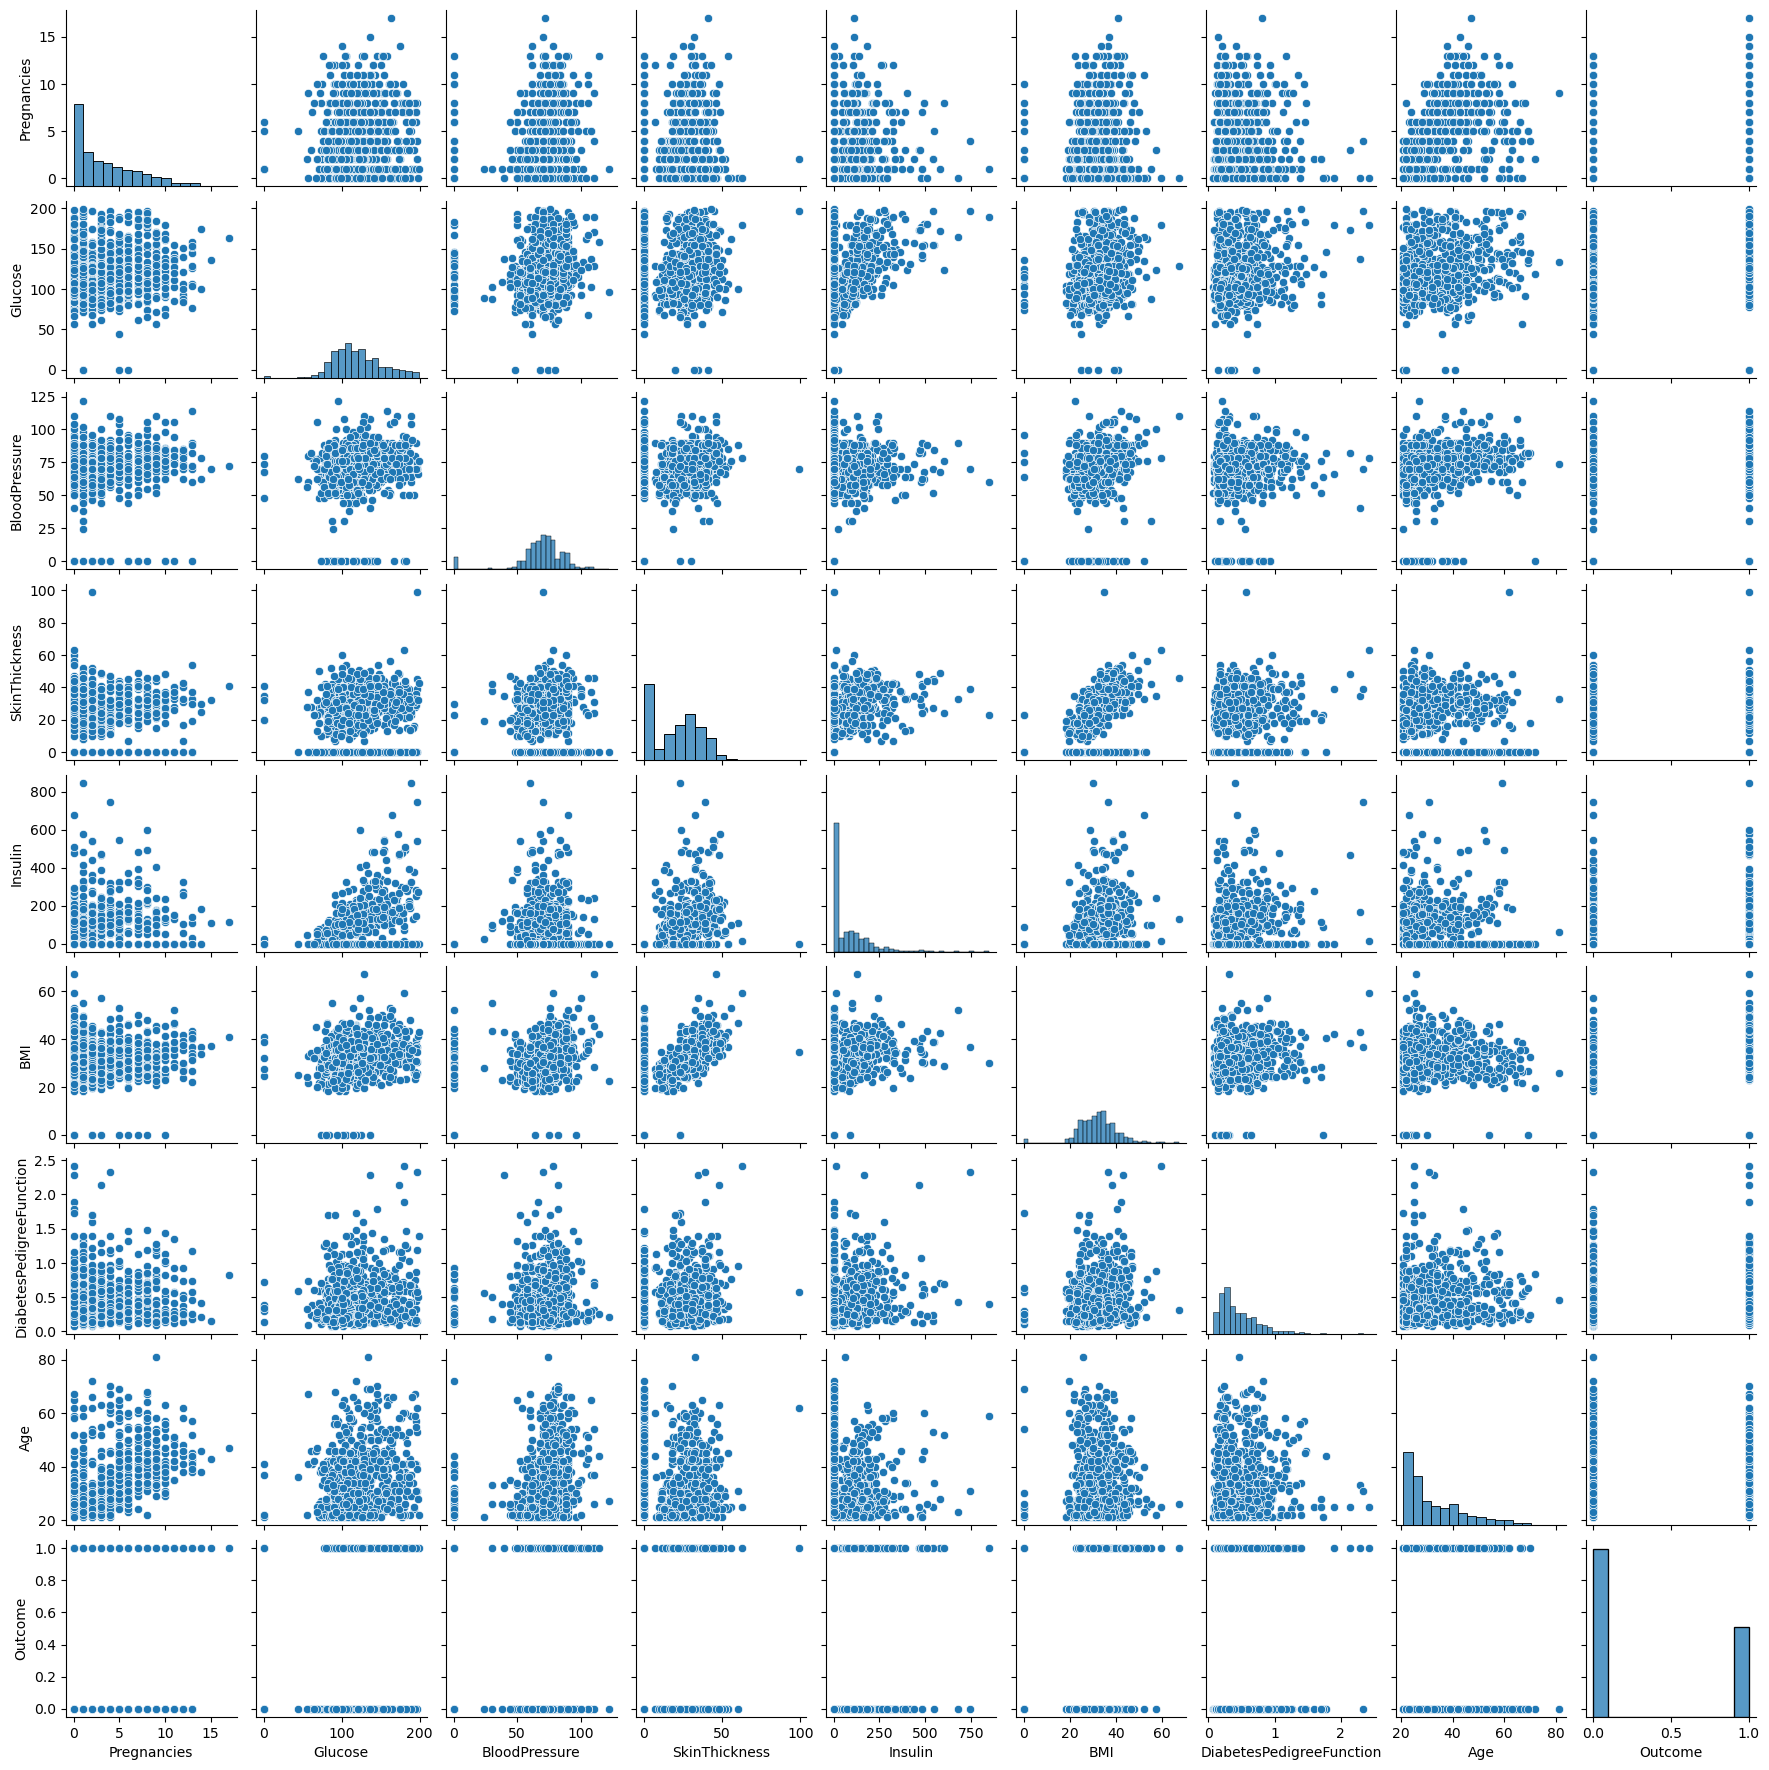

In [16]:
sns.pairplot(data = df, height = 2)  
plt.show()

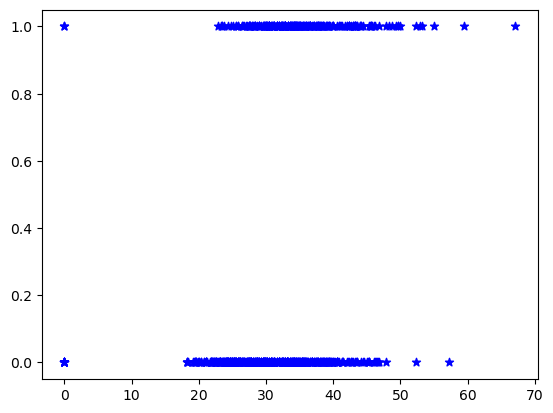

In [17]:
plt.scatter(df['BMI'],df['Outcome'],marker='*',color='b')
plt.show()

In [18]:
x=df[['BMI']]
x

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [19]:
y=df[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 1)
(231, 1)
(537, 1)
(231, 1)


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model= LogisticRegression()

In [25]:
model

LogisticRegression()

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_predict = model.predict(x_test)

In [28]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [29]:
model.predict([[26.6]])

array([0], dtype=int64)

In [30]:
model.predict([[43.1]])

array([1], dtype=int64)

In [31]:
model.score(x_train,y_train) #checking accuracy

0.6554934823091247

In [32]:
model.score(x_test,y_test)

0.6753246753246753

In [33]:
model.score(x_test,y_test)*100 

67.53246753246754

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
performance = confusion_matrix(y_test,y_predict)

In [36]:
performance

array([[135,  18],
       [ 57,  21]], dtype=int64)

In [37]:
from sklearn.metrics import plot_confusion_matrix

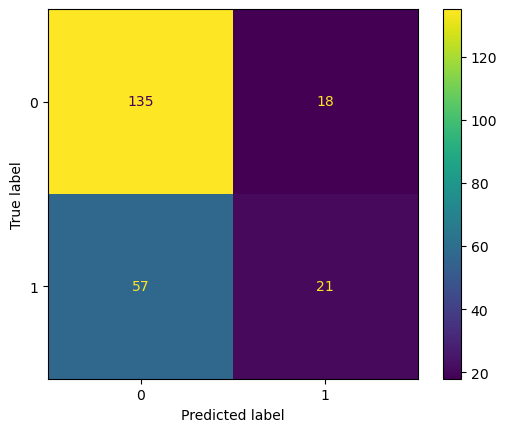

In [38]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       154
           1       0.64      0.27      0.38        77

    accuracy                           0.71       231
   macro avg       0.68      0.60      0.59       231
weighted avg       0.69      0.71      0.67       231

